# Clustering for Cancer:

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
#from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys
import warnings
warnings.filterwarnings('ignore')

In [17]:
df=pd.read_csv("new_datapfe.csv")
pd.set_option('display.max_columns', None)
df 

,Patient_ID,SEX,MARITAL,EDUCA,WEIGHT2,HEIGHT3,_INCOMG,_BMI5,_AGEG5YR,GENHLTH,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,ALCDAY5,AVEDRNK2,MAXDRNKS,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,DRNKANY5,MENTHLTH,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,_MICHD,CHCSCNCR,DIABETE3,SMOKE100,SMOKDAY2,USENOW3,_SMOKER3,_RFSMOK3,PHYSHLTH
0,1,2,1,4,280.0,510.0,2,4018.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,18,310.0,320.0,310.0,305.0,101.0,33.0,67.0,33.0,17.0,100.0,50.0,217.0,2,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,2,1,15.0
1,2,2,2,6,165.0,508.0,1,2509.0,7,3.0,1.0,64.000000,212.0,100.0,69.0,212.0,100.0,0.0,1.0,2.0,0,1,0,1,2,0,305.0,302.0,202.0,202.0,304.0,17.0,7.0,29.0,29.0,13.0,24.0,78.0,2,2,3.0,1.0,1,4.0,2.0,2,2.0,2,2.0,2.0,3.0,1.0,1.0,3.0,1,2,0.0
2,3,2,2,4,158.0,511.0,5,2204.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,900,1,99900,1,1,0,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,3.0,1.0,1,1.0,1.0,7,2.0,1,2.0,2.0,3.0,2.0,3.0,3.0,2,1,15.0
3,4,2,1,4,180.0,507.0,5,2819.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,30,101.0,555.0,301.0,301.0,201.0,100.0,0.0,3.0,3.0,14.0,100.0,20.0,1,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,30.0
4,5,2,1,5,142.0,504.0,5,2437.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,102.0,203.0,204.0,310.0,320.0,200.0,43.0,57.0,33.0,67.0,100.0,200.0,1,1,3.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,441452,2,3,2,104.0,503.0,2,1842.0,11,4.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,555.0,205.0,555.0,201.0,201.0,0.0,71.0,0.0,14.0,14.0,29.0,200.0,2,2,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,1.0,2.0,3.0,3.0,2,1,0.0
441452,441453,2,1,5,160.0,503.0,1,2834.0,2,1.0,1.0,64.000000,105.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,202.0,303.0,201.0,202.0,100.0,29.0,10.0,14.0,29.0,117.0,82.0,1,2,3.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,0.0
441453,441454,2,1,4,247.0,505.0,3,4110.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,202.0,2.0,2.0,7,1,93,1,1,20,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,1.0,1.0,1,1.0,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,2,1,0.0
441454,441455,1,5,5,166.0,511.0,1,2315.0,7,3.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,101.0,202.0,301.0,301.0,100.0,100.0,29.0,3.0,3.0,200.0,135.0,1,1,1.0,1.0,1,1.0,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,2,1,0.0


In [3]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate target variable from features
X = df.drop('CHCSCNCR', axis=1)
y = df['CHCSCNCR']

In [4]:
# Select top k features using mutual information score
k = 20
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)

SelectKBest(k=20,
            score_func=<function mutual_info_classif at 0x0000022D36159D30>)

In [5]:
# Get selected feature indices and names
selected_features = X.columns[selector.get_support()]
print('Selected features:', selected_features)

Selected features: Index(['SEX', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1', 'BPHIGH4',
       'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDINFR4', 'CVDCRHD4',
       'CVDSTRK3', '_MICHD', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3',
       '_SMOKER3', '_RFSMOK3'],
      dtype='object')


KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7ff182e38820>,
                 estimator=KMeans(n_clusters=10, random_state=42), k=(1, 11))

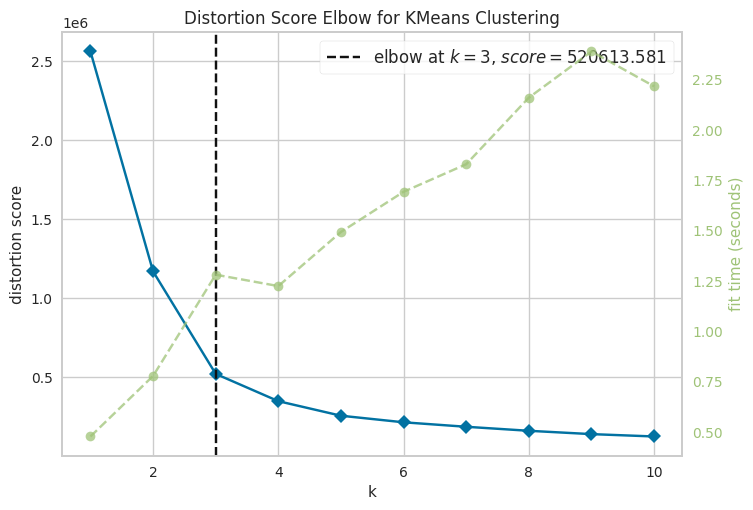

In [18]:
features = ['SEX', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1', 'BPHIGH4',
       'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDINFR4', 'CVDCRHD4',
       'CVDSTRK3', '_MICHD', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3',
       '_SMOKER3', '_RFSMOK3','CHCSCNCR']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1, 11))

# Fit the data to the visualizer
visualizer.fit(df_pca)

# Visualize the elbow curve
visualizer.show()

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Behavioral Segmentation Clustering For Cancer')

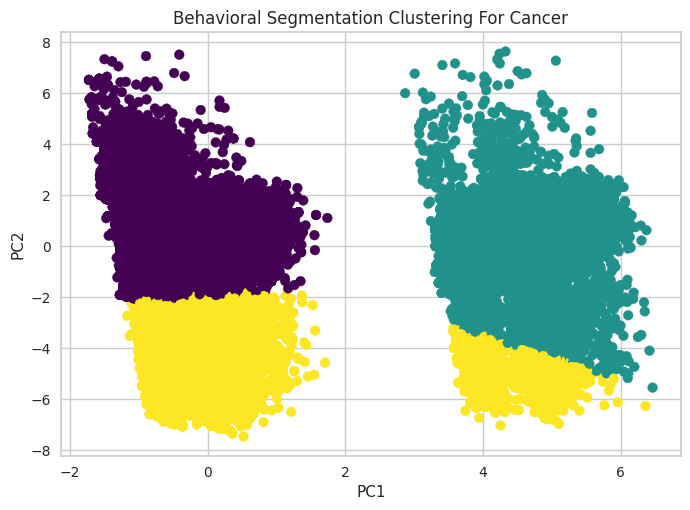

In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmodel = kmeans.fit_predict(df_pca)

# Visualize the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=kmodel, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Behavioral Segmentation Clustering For Cancer')
plt.show()

In [8]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

#for i in range(kmeans.n_clusters):
 #   cluster = clustered_data.loc[clustered_data['cluster'] == i]
  #  profile = ProfileReport(cluster, title=f"Cluster {i} Profile Report", explorative=True)
   # profile.to_file(f"clustering11_{i}_profile.html")

Cluster Sizes:
Cluster 0: 348451
Cluster 1: 34210
Cluster 2: 58795

Cluster Means:
              SEX  EXERANY2  _RFBING5  _RFDRHV5   _VEGLT1   BPHIGH4    BPMEDS  \
cluster                                                                         
0        1.594787  1.215152  1.102382  1.042804  1.168661  2.258803  1.060746   
1        1.465361  1.363403  1.039784  1.022450  1.215785  1.419731  1.054195   
2        1.533107  1.340879  1.230802  1.108547  1.248763  2.268594  1.098852   

         BLOODCHO   CHOLCHK   TOLDHI2  CVDINFR4  CVDCRHD4  CVDSTRK3    _MICHD  \
cluster                                                                         
0        1.234991  1.315436  1.663795  2.019842  1.999128  1.984546  1.995041   
1        1.056124  1.090617  1.294534  1.379363  1.297428  1.834405  1.020345   
2        1.366426  1.392806  1.682201  1.983604  1.983825  1.974675  1.942325   

         DIABETE3  SMOKE100  SMOKDAY2   USENOW3  _SMOKER3  _RFSMOK3  CHCSCNCR  
cluster                  

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cluster_labels = kmeans.labels_
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(daf.drop('CHCSCNCR', axis=1), cluster_labels, test_size=0.2, random_state=42)

# Train a classifier on the training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate accuracy of predictions
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

DecisionTreeClassifier(random_state=42)

Accuracy: 0.997734789108866


In [7]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#kmeans_silhouette = silhouette_score(daf, kmodel)
kmeans_calinski = calinski_harabasz_score(daf, kmodel)
kmeans_davies = davies_bouldin_score(daf, kmodel)

#print("KMeans - Silhouette Coefficient: ", kmeans_silhouette)
print("KMeans - Calinski-Harabasz Index: ", kmeans_calinski)
print("KMeans - Davies-Bouldin Index: ", kmeans_davies)

KMeans - Calinski-Harabasz Index:  42656.8318980078
KMeans - Davies-Bouldin Index:  2.034365313324976


### Cancer Risk Prediction:

In [20]:
# Split data into features (X) and target variable (y)
X = daf.drop('CHCSCNCR', axis=1)
y = daf['CHCSCNCR']

# Add the cluster labels as a new column to the DataFrame
#cluster_labels = kmeans.labels_
#daf['cluster'] = cluster_labels

In [21]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from catboost import CatBoostClassifier
# Define the hyperparameters for the CatBoost algorithm
params = {'learning_rate': 0.1, 'depth': 6,\
          'l2_leaf_reg': 3, 'iterations': 100}
  
# Initialize the CatBoostClassifier object 
# with the defined hyperparameters and fit it on the training set
model = CatBoostClassifier(**params)
model.fit(X_train, y_train)

0:	learn: 0.6048943	total: 30.1ms	remaining: 2.98s
1:	learn: 0.5357568	total: 52.5ms	remaining: 2.57s
2:	learn: 0.4804584	total: 75.8ms	remaining: 2.45s
3:	learn: 0.4386300	total: 97ms	remaining: 2.33s
4:	learn: 0.4097264	total: 116ms	remaining: 2.2s
5:	learn: 0.3868690	total: 138ms	remaining: 2.16s
6:	learn: 0.3672321	total: 159ms	remaining: 2.11s
7:	learn: 0.3523685	total: 180ms	remaining: 2.07s
8:	learn: 0.3412462	total: 201ms	remaining: 2.03s
9:	learn: 0.3323589	total: 227ms	remaining: 2.04s
10:	learn: 0.3253693	total: 250ms	remaining: 2.02s
11:	learn: 0.3202361	total: 271ms	remaining: 1.99s
12:	learn: 0.3159239	total: 293ms	remaining: 1.96s
13:	learn: 0.3123827	total: 323ms	remaining: 1.98s
14:	learn: 0.3098087	total: 346ms	remaining: 1.96s
15:	learn: 0.3074940	total: 368ms	remaining: 1.93s
16:	learn: 0.3057404	total: 390ms	remaining: 1.91s
17:	learn: 0.3042232	total: 419ms	remaining: 1.91s
18:	learn: 0.3029756	total: 441ms	remaining: 1.88s
19:	learn: 0.3019067	total: 465ms	remain

In [23]:
from sklearn.metrics import precision_score, recall_score
# Predict the target variable on the validation
# set and evaluate the performance
catboost_md = model.predict(X_test)
# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, catboost_md,average = 'macro')
recall = recall_score(y_test, catboost_md,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9048611425723735
Precision: 0.9524300325061444
Recall: 0.5000595167241995


In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score
# Train a gradient boosting classifier on the training data
model_gb = XGBClassifier(eval_metric='error')
model_gb.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_gb = model_gb.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy_gb = model_gb.score(X_test, y_test)
precision = precision_score(y_test, y_pred_gb,average = 'macro')
recall = recall_score(y_test, y_pred_gb,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy_gb)
print("Precision:", precision)
print("Recall:", recall)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

Accuracy: 0.9046912517555384
Precision: 0.50798209111529
Recall: 0.5000188970125051


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

# Train a random forest classifier on the training data
model_ranfor = RandomForestClassifier()
model_ranfor.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_ranfor = model_ranfor.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy_ranfor = model_ranfor.score(X_test, y_test)
precision = precision_score(y_test, y_pred_ranfor,average = 'macro')
recall = recall_score(y_test, y_pred_ranfor,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy_ranfor)
print("Precision:", precision)
print("Recall:", recall)

RandomForestClassifier()

Accuracy: 0.9030376478050106
Precision: 0.5063611744761477
Recall: 0.5001703159740958


In [26]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score
# Train an SVM model on the training data
model_svm = SGDClassifier(loss='hinge')
model_svm.n_jobs = -1
model_svm.fit(X_train, y_train)

SGDClassifier(n_jobs=-1)

In [27]:
# Predict the health behavior for the test data
y_pred_svm = model_svm.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy_svm = model_svm.score(X_test, y_test)
precision = precision_score(y_test, y_pred_svm,average = 'macro')
recall = recall_score(y_test, y_pred_svm,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy_svm)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9048498165179178
Precision: 0.4524249082589589
Recall: 0.5
